In [39]:
import pandas as pd

metrics_merged = pd.read_csv("metric_values.csv")

In [40]:
# define the directory where the data is
data_path = "/home/jcapela/ec_number_prediction_version_2/ec_numbers_prediction/required_data_ec_number_paper"

In [41]:
from plants_sm.io.pickle import read_pickle
import os
f1_scores_path = os.path.join(data_path, "f1_scores")

# Create a column for standard deviation
metrics_merged['std_dev'] = None

# Function to match filename to the DataFrame's metric
def get_metric_name(filename):
    if "f1_score" in filename:
        return "mF1"
    elif "recall_score" in filename:
        return "mRecall"
    elif "precision_score" in filename:
        return "mPrecision"
    else:
        return None

# Loop through each file in the f1_scores folder
for filename in os.listdir(f1_scores_path):
    if filename.endswith(".pkl"):
        # Load the data

        data = read_pickle(os.path.join(f1_scores_path, filename))
        
        # Calculate the standard deviation
        std_dev = pd.Series(data).std()

        # Identify the model and metric in the filename
        model_name = filename.split("_")[0]
        metric_name = get_metric_name(filename)

        # Update the DataFrame
        metrics_merged.loc[(metrics_merged['model'] == model_name) & (metrics_merged['metric'] == metric_name), 'std_dev'] = std_dev
        metrics_merged.loc[(metrics_merged['model'] == model_name) & (metrics_merged['metric'] == f"{metric_name} level 1"), 'std_dev'] = pd.Series(data[:7]).std()
        metrics_merged.loc[(metrics_merged['model'] == model_name) & (metrics_merged['metric'] == f"{metric_name} level 2"), 'std_dev'] = pd.Series(data[7:84]).std()
        metrics_merged.loc[(metrics_merged['model'] == model_name) & (metrics_merged['metric'] == f"{metric_name} level 3"), 'std_dev'] = pd.Series(data[84:314]).std()
        metrics_merged.loc[(metrics_merged['model'] == model_name) & (metrics_merged['metric'] == f"{metric_name} level 4"), 'std_dev'] = pd.Series(data[ 314:]).std()

metrics_merged

,model,metric,train,test,std_dev
0,DNN ESM2 3B,mPrecision,0.980186,0.920965,0.123184
1,DNN ESM2 3B,mRecall,0.987387,0.886325,0.153437
2,DNN ESM2 3B,mF1,0.983515,0.899392,0.134967
3,DNN ESM2 3B,mPrecision level 1,0.995490,0.984224,0.009403
4,DNN ESM2 3B,mRecall level 1,0.996687,0.978414,0.009351
...,...,...,...,...,...
115,Models ensemble,mRecall,NaN,0.885065,0.154307
116,Models ensemble,mRecall level 1,NaN,0.977706,0.010113
117,Models ensemble,mRecall level 2,NaN,0.945906,0.055191
118,Models ensemble,mRecall level 3,NaN,0.919030,0.10059


In [42]:
metrics_merged.head()

,model,metric,train,test,std_dev
0,DNN ESM2 3B,mPrecision,0.980186,0.920965,0.123184
1,DNN ESM2 3B,mRecall,0.987387,0.886325,0.153437
2,DNN ESM2 3B,mF1,0.983515,0.899392,0.134967
3,DNN ESM2 3B,mPrecision level 1,0.995490,0.984224,0.009403
4,DNN ESM2 3B,mRecall level 1,0.996687,0.978414,0.009351


In [43]:
# divide into 5 dataframes, one for each metric level which is in the column "metric" as a string
metrics_merged_1 = metrics_merged[metrics_merged["metric"].str.contains(" 1")]
metrics_merged_2 = metrics_merged[metrics_merged["metric"].str.contains("2")]
metrics_merged_3 = metrics_merged[metrics_merged["metric"].str.contains("3")]
metrics_merged_4 = metrics_merged[metrics_merged["metric"].str.contains("4")]
metrics_merged_overall = metrics_merged[~metrics_merged["metric"].str.contains("level")]

In [44]:
metrics_merged_1_f1 = metrics_merged_1[metrics_merged_1["metric"].str.contains("F1")]
metrics_merged_2_f1 = metrics_merged_2[metrics_merged_2["metric"].str.contains("F1")]
metrics_merged_3_f1 = metrics_merged_3[metrics_merged_3["metric"].str.contains("F1")]
metrics_merged_4_f1 = metrics_merged_4[metrics_merged_4["metric"].str.contains("F1")]
metrics_merged_merged = pd.concat([metrics_merged_1_f1, metrics_merged_2_f1, metrics_merged_3_f1, metrics_merged_4_f1])

In [45]:
color_map = {'DNN ESM2 35M': (0.00392156862745098,
  0.45098039215686275,
  0.6980392156862745),
 'DNN ESM2 150M': (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 'DNN ESM2 8M': (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 'DNN ProtBERT': (0.8352941176470589, 0.3686274509803922, 0.0),
 'DNN ESM2 3B': (0.8, 0.47058823529411764, 0.7372549019607844),
 'DNN ESM2 650M': (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 'DNN ESM1b': (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 'DeepEC CNN3': (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 'D-SPACE EC': (0.9254901960784314, 0.8823529411764706, 0.2),
 'Models + BLASTp': (0.00392156862745098,
  0.45098039215686275,
  0.6980392156862745),
 'Models ensemble': (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
    'BLASTp': (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),}

/tmp/ipykernel_2990374/3561744173.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(


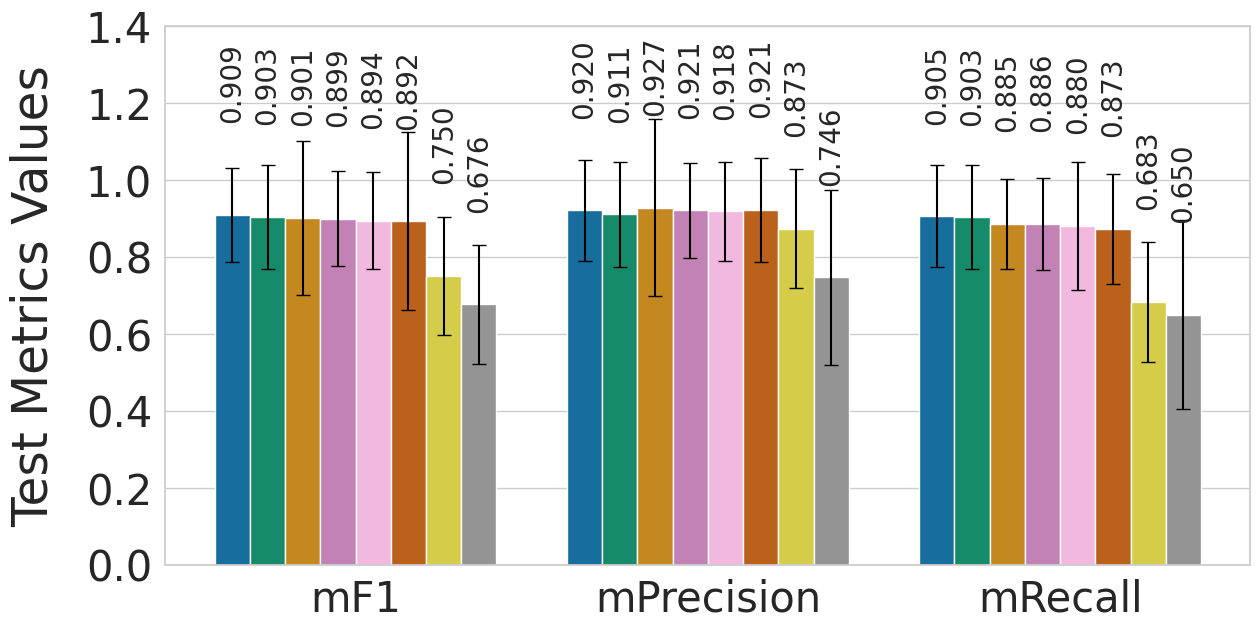

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

matplotlib.rcParams['savefig.transparent'] = True

# Sort data by metric and test values for visual clarity
metrics_merged_overall = metrics_merged_overall.sort_values(by=['metric', 'test'], ascending=[True, False])

# Set up the seaborn figure
sns.set(rc={'figure.figsize':(11.7, 5)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Create the bar plot with error bars
plt.figure(figsize=(14, 7))
g = sns.barplot(
    x="metric", 
    y="test", 
    hue="model", 
    data=metrics_merged_overall, 
    palette=color_map, 
    ci=None,
        # Disable default confidence interval
)

# Add error bars for each bar individually
for i, (bar, std_dev) in enumerate(zip(g.patches, metrics_merged_overall['std_dev'])):
    height = bar.get_height()
    g.errorbar(
        x=bar.get_x() + bar.get_width() / 2, 
        y=height, 
        yerr=std_dev, 
        fmt='none', 
        ecolor='black', 
        capsize=5
    )
    
    # Annotate bar heights
    g.annotate(
        f'{height:.3f}', 
        (bar.get_x() + bar.get_width() / 2, height+0.3), 
        ha='center', 
        va='center',
        xytext=(0, 12), 
        textcoords='offset points',
        fontsize=20,  # Adjust the fontsize as needed
        rotation=90
    )

# Customize plot labels and limits
plt.xlabel("")
plt.ylabel("Test Metrics Values", labelpad=20, fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim(0, 1.40)
plt.legend().remove()

# Save plot
plt.savefig("overall_metrics.png", dpi=400, bbox_inches='tight')
plt.show()


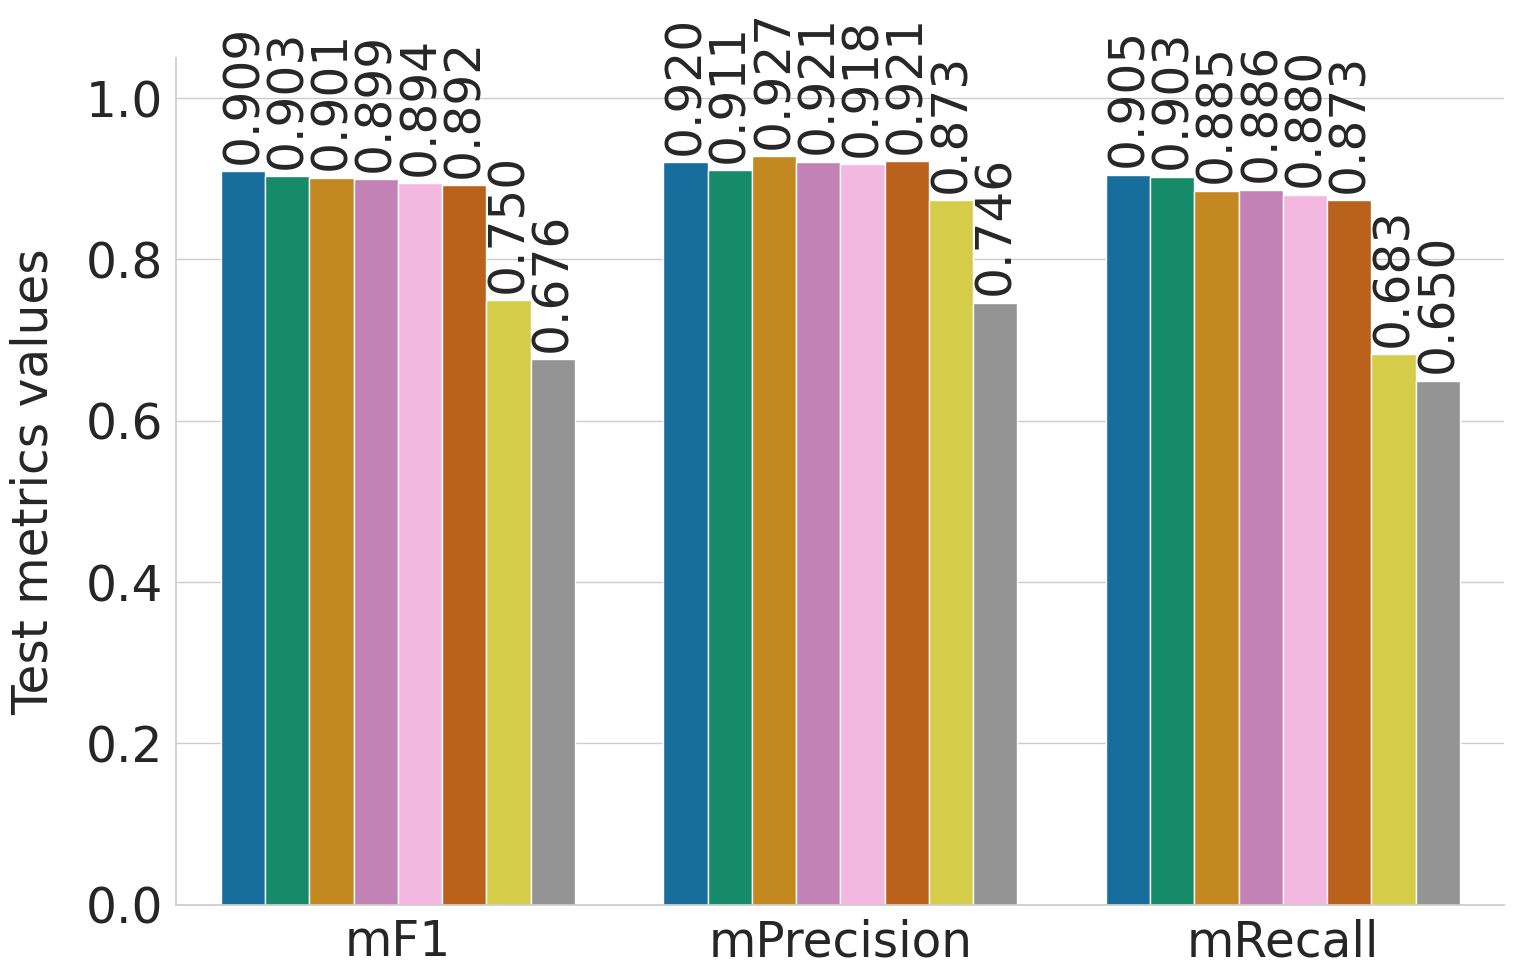

In [32]:
# generate a barplot with all metrics

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['savefig.transparent'] = True

metrics_merged_overall = metrics_merged_overall.sort_values(by=['metric', 'test'], ascending=[True, False])

sns.set(rc={'figure.figsize':(11.7,5)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_palette("Set2")
 

g = sns.catplot(x="metric", y="test", hue="model", data=metrics_merged_overall, kind="bar", height=10, aspect=1.5, palette=color_map, legend=False)


# sort the bars by mF1
#plt.title("Overall Metrics for Test Set", pad=10, fontsize=30)
plt.xlabel("")
plt.ylabel("Test metrics values", labelpad=20, fontsize=35)
#legend.set_title("Method",prop={"size":30})
 
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.3f'),
                    (p.get_x() + p.get_width() / 2., p.get_height() +  0.08),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=35,  # Adjust the fontsize here
                    rotation=90)
 
 
g.set_xticklabels(size=35)
g.set_yticklabels(size=35)
g.set(ylim=(0, 1.05))
plt.savefig("overall_metrics.png", dpi=400, bbox_inches='tight')

In [2]:
import os
import pandas as pd

# define the directory where the data is
data_path = "/home/jcapela/ec_number_prediction_version_2/ec_numbers_prediction/required_data_ec_number_paper/"

test = pd.read_csv(os.path.join(data_path, "data", "test.csv"))

/tmp/ipykernel_709406/1187032457.py:7: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv(os.path.join(data_path, "data", "test.csv"))


In [3]:
labels = list(test.columns[8:])

In [8]:
from plants_sm.io.pickle import read_pickle
import os

# define the directory where the data is
data_path = "/home/jcapela/ec_number_prediction_version_2/ec_numbers_prediction/required_data_ec_number_paper/"

files = os.listdir(os.path.join(data_path, "f1_scores"))

results = pd.DataFrame(columns=["Model", "EC", "F1 score"])
for file in files:
    if "f1_score" in file:
        tool_f1_scores = read_pickle(os.path.join(data_path, "f1_scores", file))
        model = file.replace("_f1_score.pkl", "")

        ecs = labels
        results_ = pd.DataFrame({
            "Model": [model]*len(ecs),
            "EC": ecs,
            "F1 score": tool_f1_scores
        })
        results = pd.concat((results, results_))



In [9]:
results

,Model,EC,F1 score
0,BLASTp,1,0.987944
1,BLASTp,2,0.987504
2,BLASTp,3,0.982751
3,BLASTp,4,0.974576
4,BLASTp,5,0.973816
...,...,...,...
2766,Models + BLASTp,7.6.2.13,1.000000
2767,Models + BLASTp,7.6.2.2,0.684211
2768,Models + BLASTp,7.6.2.3,0.888889
2769,Models + BLASTp,7.6.2.5,1.000000


In [12]:
from scipy.stats import wilcoxon
import itertools

pipeline_names = results['Model'].unique()

significant_differences_f1 = []
# Perform Wilcoxon test per EC level
for model1, model2 in itertools.combinations(pipeline_names, 2):
    subset1 = results[results["Model"] == model1]
    subset2 = results[results["Model"] == model2]
    stat, p_value = wilcoxon(subset1['F1 score'], subset2['F1 score'])

    if p_value < 0.05:
        significant_differences_f1.append((model1, model2, p_value))


# Print out the pairs of pipelines that have significantly different F1 scores
for diff in significant_differences_f1:
    
    print(f"Significant difference between {diff[0]} and {diff[1]} with p-value {diff[2]}")


Significant difference between BLASTp and DNN ESM1b with p-value 1.2724330394084156e-19
Significant difference between BLASTp and DNN ESM2 3B with p-value 8.782400446192353e-06
Significant difference between BLASTp and DNN ProtBERT with p-value 1.4632893688511623e-25
Significant difference between BLASTp and D-SPACE EC with p-value 0.0
Significant difference between BLASTp and DeepEC CNN3 with p-value 0.0
Significant difference between BLASTp and Models ensemble with p-value 0.008407618683527995
Significant difference between BLASTp and Models + BLASTp with p-value 4.180541198573959e-07
Significant difference between DNN ESM1b and DNN ESM2 3B with p-value 4.686409290145876e-13
Significant difference between DNN ESM1b and DNN ProtBERT with p-value 0.000417949231554754
Significant difference between DNN ESM1b and D-SPACE EC with p-value 0.0
Significant difference between DNN ESM1b and DeepEC CNN3 with p-value 0.0
Significant difference between DNN ESM1b and Models ensemble with p-value 1

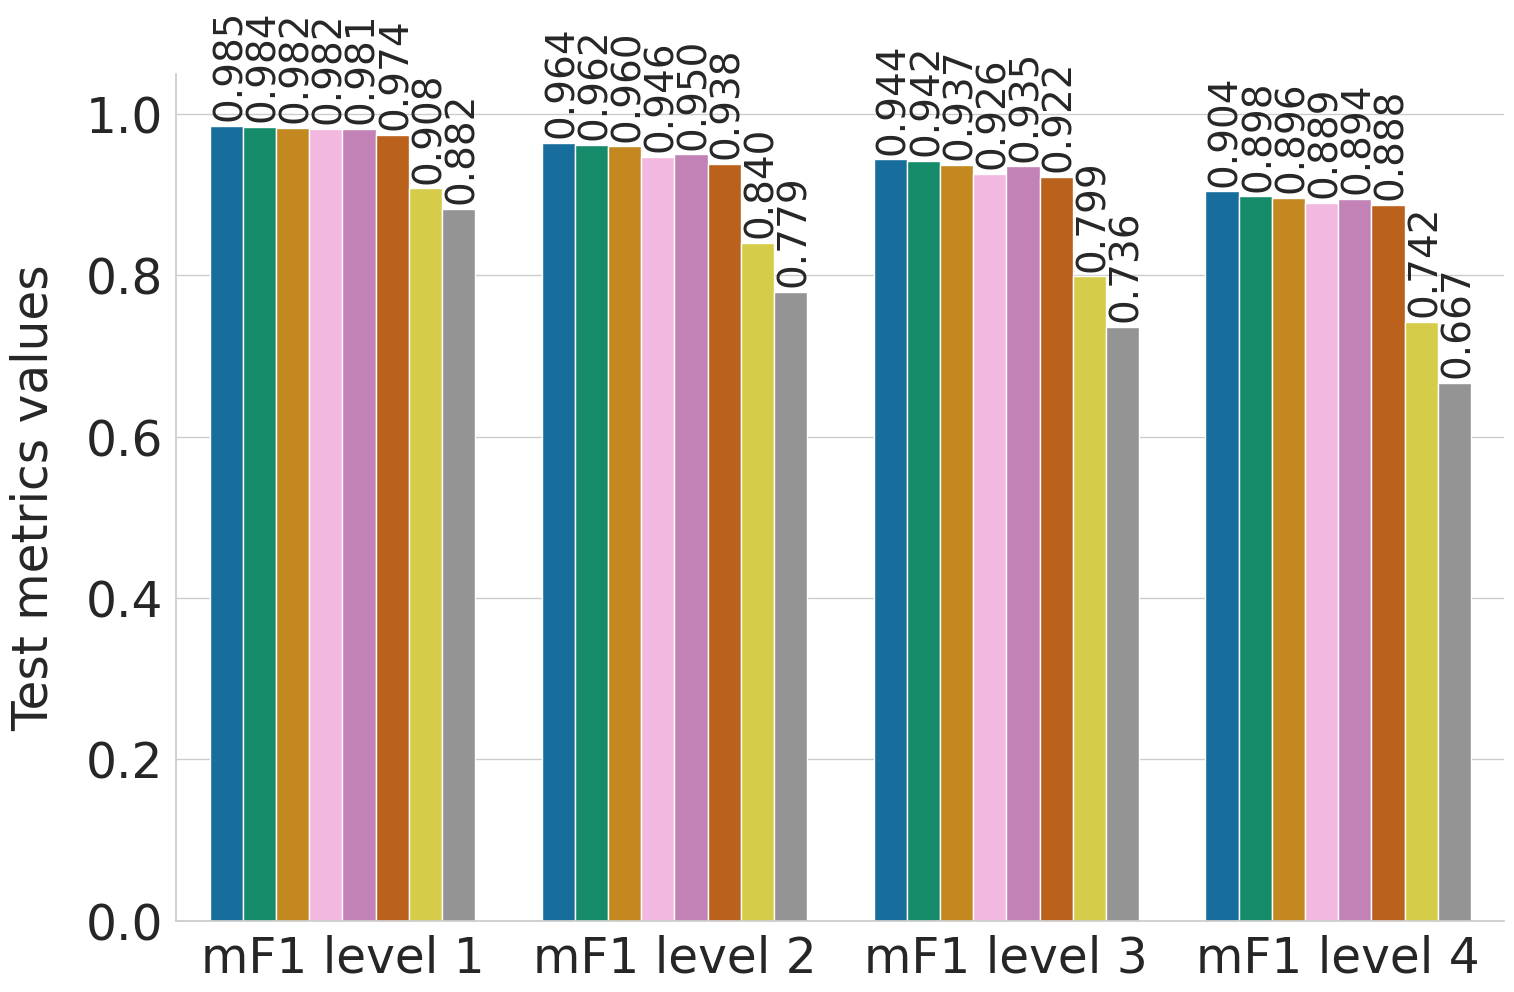

In [34]:
# generate a barplot with all metrics

import seaborn as sns
import matplotlib.pyplot as plt

metrics_merged_merged = metrics_merged_merged.sort_values(by=['metric', 'test'], ascending=[True, False])

sns.set(rc={'figure.figsize':(11.7,5)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_palette("Set2")
matplotlib.rcParams['savefig.transparent'] = True
 
g = sns.catplot(x="metric", y="test", hue="model", data=metrics_merged_merged, kind="bar", height=10, aspect=1.5, palette=color_map, legend=False)

# sort the bars by mF1
#plt.title("mF1 Scores for Test Set", pad=10, fontsize=30)
plt.ylabel("Test metrics values", labelpad=20, fontsize=35)
 
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.3f'),
                    (p.get_x() + p.get_width() / 2 + 0.01, p.get_height() +  0.06),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=28,  # Adjust the fontsize here
                    rotation=90)

legend = plt.legend(bbox_to_anchor=(0.05, -0.3), loc=2, borderaxespad=0., prop={'size': 45}, ncol=2)
fig  = legend.figure
fig.canvas.draw()
bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig("legend.png", dpi="figure", bbox_inches=bbox)
legend.remove()

plt.xlabel("")

g.set_xticklabels(size=35)
g.set_yticklabels(size=35)
g.set(ylim=(0, 1.05))
plt.savefig("mf1_metrics_levels.png", dpi=400, bbox_inches='tight')

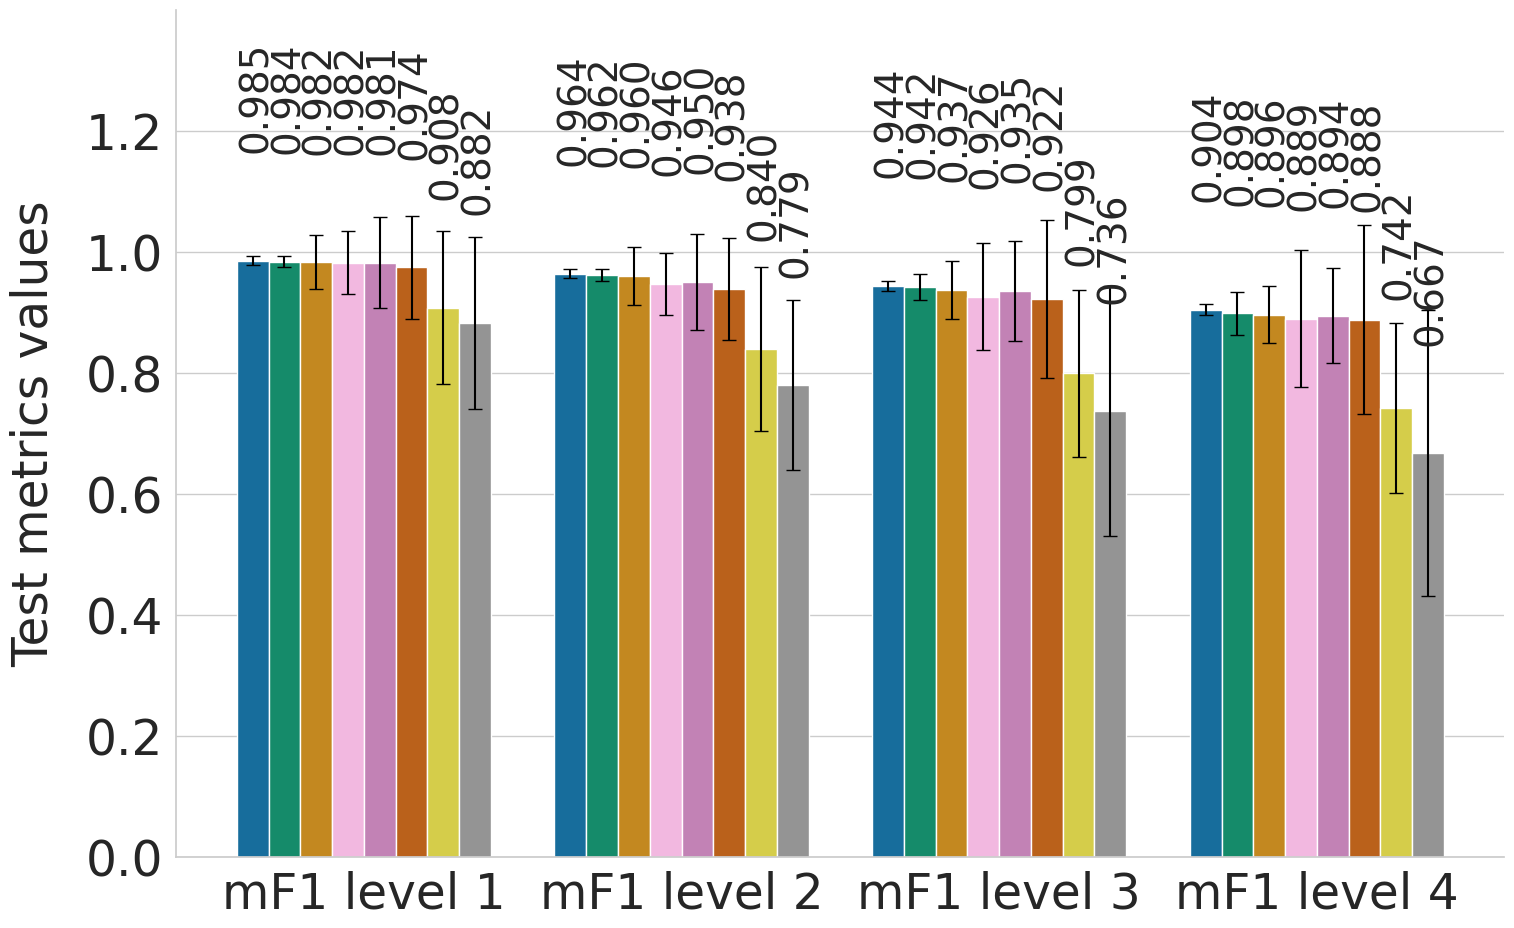

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# Ensure your data is sorted as required
metrics_merged_merged = metrics_merged_merged.sort_values(by=['metric', 'test'], ascending=[True, False])

# Set figure size, font scale, style, and palette
sns.set(rc={'figure.figsize': (11.7, 5)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_palette("Set2")
matplotlib.rcParams['savefig.transparent'] = True

# Create the bar plot
g = sns.catplot(x="metric", y="test", hue="model", data=metrics_merged_merged, 
                kind="bar", height=10, aspect=1.5, palette=color_map, legend=False)

# Add error bars
for ax in g.axes.flat:
    for i, p in enumerate(ax.patches):
        # Get the model and metric for the current bar
        model_name = metrics_merged_merged['model'].iloc[i]
        metric_name = metrics_merged_merged['metric'].iloc[i]
        
        # Get the corresponding standard deviation
        std_value = metrics_merged_merged[(metrics_merged_merged['model'] == model_name) & 
                                           (metrics_merged_merged['metric'] == metric_name)]['std_dev'].values[0]
        
        # Draw the error bar
        ax.errorbar(p.get_x() + p.get_width() / 2, p.get_height(), yerr=std_value, 
                    fmt='none', c='black', capsize=5)

# Adjust the rest of the plot as before
plt.ylabel("Test metrics values", labelpad=20, fontsize=35)

for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.3f'),
                    (p.get_x() + p.get_width() / 2 + 0.01, p.get_height() + 0.25),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=28,  # Adjust the fontsize here
                    rotation=90)

legend = plt.legend(bbox_to_anchor=(0.05, -0.3), loc=2, borderaxespad=0., prop={'size': 45}, ncol=2)
fig = legend.figure
fig.canvas.draw()
bbox = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig("legend.png", dpi="figure", bbox_inches=bbox)
legend.remove()

plt.xlabel("")
g.set_xticklabels(size=35)
g.set_yticklabels(size=35)
g.set(ylim=(0, 1.4))
plt.savefig("mf1_metrics_levels.png", dpi=400, bbox_inches='tight')


In [1]:
# define the directory where the data is
data_path = "/home/jcapela/ec_number_prediction_version_2/ec_numbers_prediction/required_data_ec_number_paper/"

In [1]:
import pandas as pd

f1_scores = pd.read_csv("f1_score_per_ec_results.csv")

In [3]:
color_map = {'DNN ESM2 35M': (0.00392156862745098,
  0.45098039215686275,
  0.6980392156862745),
 'DNN ESM2 150M': (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 'DNN ESM2 8M': (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 'DNN ProtBERT': (0.8352941176470589, 0.3686274509803922, 0.0),
 'DNN ESM2 3B': (0.8, 0.47058823529411764, 0.7372549019607844),
 'DNN ESM2 650M': (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 'DNN ESM1b': (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 'DeepEC CNN3': (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 'D-SPACE EC': (0.9254901960784314, 0.8823529411764706, 0.2),
 'Models + BLASTp': (0.00392156862745098,
  0.45098039215686275,
  0.6980392156862745),
 'Models ensemble': (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
    'BLASTp': (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),}

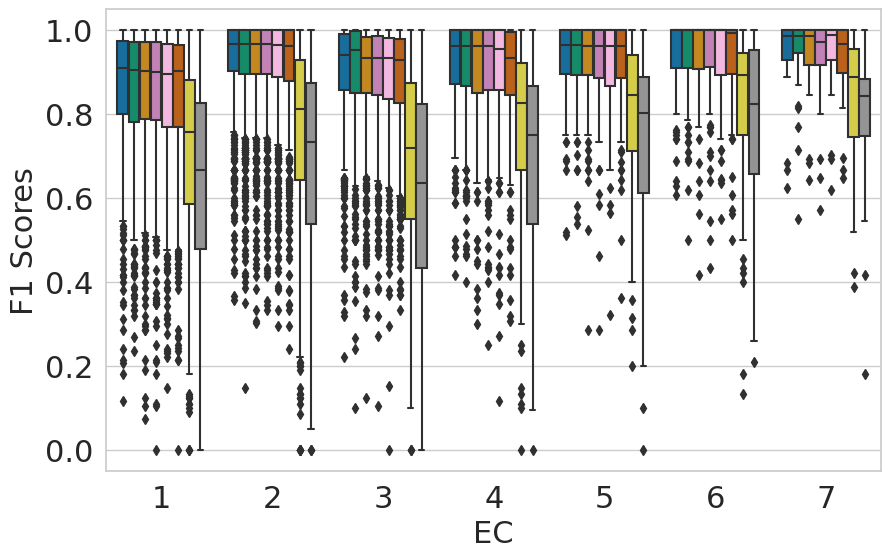

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

def plot_f1_scores(f1_scores, level=4):
    matplotlib.rcParams['savefig.transparent'] = True

    # Set plot style for better visuals
    sns.set(style="whitegrid")

    # Specify the custom order of Models
    custom_model_order = ['Models + BLASTp','BLASTp', 'Models ensemble', 'DNN ESM2 3B', 'DNN ESM1b', 'DNN ProtBERT',
                        'D-SPACE EC', 'DeepEC CNN3'] 

    # Create a boxplot for F1 scores by EC Level and Model
    plt.figure(figsize=(10, 6))  # You can adjust the figure size as needed

    # Boxplot grouped by 'Level' and 'Model'
    g = sns.boxplot(x="Level", y="F1 score", hue="Model", data=f1_scores, palette=color_map, hue_order=custom_model_order)

    # Add a title and labels
    plt.xlabel("EC", fontsize=22)
    plt.ylabel("F1 Scores", fontsize=22)
    # plt.title(f"Level {level}", fontsize=22, pad=20)
    legend = plt.legend(bbox_to_anchor=(0.05, -0.3), loc=2, borderaxespad=0., prop={'size': 45}, ncol=6)
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig("legend_boxplots.png", dpi="figure", bbox_inches=bbox)
    legend.remove()


    g.set_xticklabels(labels=["1", "2", "3", "4", "5", "6", "7"], size=22)
    plt.yticks(size=22)
    plt.savefig(f"f1_scores_per_model_ec_{level}.png", dpi=400, bbox_inches='tight')
    # Show plot
    plt.show()


plot_f1_scores(f1_scores)

In [7]:
f1_scores.drop(columns=["Unnamed: 0"]).head()

,Model,Level,EC,F1 score
0,BLASTp,1,1.1.1.1,0.857143
1,BLASTp,1,1.1.1.100,0.791667
2,BLASTp,1,1.1.1.102,0.962963
3,BLASTp,1,1.1.1.103,0.953846
4,BLASTp,1,1.1.1.105,0.875000


In [7]:
import pandas as pd
from scipy.stats import wilcoxon
import itertools
from statsmodels.stats.multitest import multipletests

pipeline_names = f1_scores['Model'].unique()
p_values = []
comparisons = []

# Perform Wilcoxon test per EC level
for model1, model2 in itertools.combinations(pipeline_names, 2):
    for ec in f1_scores['Level'].unique():
        subset1 = f1_scores[(f1_scores['Level'] == ec) & (f1_scores["Model"] == model1)]
        subset2 = f1_scores[(f1_scores['Level'] == ec) & (f1_scores["Model"] == model2)]
        
        # Perform Wilcoxon test and collect the p-value
        stat, p_value = wilcoxon(subset1['F1 score'], subset2['F1 score'])
        p_values.append(p_value)
        comparisons.append((model1, model2, ec))

# Apply FDR correction
_, corrected_p_values, _, _ = multipletests(p_values, method='fdr_bh')

# Create a DataFrame with the results
results = []
for i, (model1, model2, ec) in enumerate(comparisons):
    results.append({
        'Model 1': model1,
        'Model 2': model2,
        'EC Level': ec,
        'Original p-value': p_values[i],
        'Corrected p-value': corrected_p_values[i]
    })

significant_df = pd.DataFrame(results)

# Filter for significant results if needed
significant_results = significant_df[significant_df['Corrected p-value'] < 0.001]

significant_results.to_csv("statistical_significances_by_level.csv")


In [18]:
import pandas as pd
writer = pd.ExcelWriter('supplementary_tables.xlsx', engine='xlsxwriter')
df = pd.read_csv('statistical_significances_by_level.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.to_excel(writer, sheet_name='Test set stat. significant', index=False)
df = pd.read_csv('statistical_significant_identity_thresholds.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.to_excel(writer, sheet_name='Identity thresholds', index=False)

writer.save()

/tmp/ipykernel_746786/4259084882.py:10: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [17]:
df

,Unnamed: 0,identity_level,tool1,tool2,p_value,corrected_p_value
0,0,90.0,BLASTp,DeepEC CNN3,0.000000e+00,0.000000e+00
1,1,90.0,BLASTp,D-SPACE EC,0.000000e+00,0.000000e+00
2,2,90.0,BLASTp,DNN ESM1b,1.043984e-224,1.511976e-224
3,3,90.0,BLASTp,DNN ESM2 3B,1.612823e-93,2.084264e-93
4,4,90.0,BLASTp,DNN ProtBERT,2.135495e-237,3.203242e-237
...,...,...,...,...,...,...
160,162,40.0,DNN ESM2 3B,DNN ProtBERT,2.935306e-237,4.363994e-237
161,163,40.0,DNN ESM2 3B,Models + BLASTp,0.000000e+00,0.000000e+00
162,165,40.0,DNN ProtBERT,Models + BLASTp,0.000000e+00,0.000000e+00
163,166,40.0,DNN ProtBERT,Models ensemble,0.000000e+00,0.000000e+00


In [11]:
significant_results[significant_results["Model 2"]=="Models + BLASTp"]

,Model 1,Model 2,EC Level,Original p-value,Corrected p-value
43,BLASTp,Models + BLASTp,2,8.122541e-06,1.447289e-05
84,DNN ESM1b,Models + BLASTp,1,2.073193e-26,7.666902e-26
85,DNN ESM1b,Models + BLASTp,2,2.555790e-23,9.276570e-23
86,DNN ESM1b,Models + BLASTp,3,8.949860e-22,2.875693e-21
87,DNN ESM1b,Models + BLASTp,4,3.533175e-09,7.213566e-09
88,DNN ESM1b,Models + BLASTp,5,7.603139e-05,1.201786e-04
89,DNN ESM1b,Models + BLASTp,6,4.591768e-05,7.437905e-05
119,DNN ESM2 3B,Models + BLASTp,1,3.421501e-14,7.983503e-14
120,DNN ESM2 3B,Models + BLASTp,2,3.253329e-13,7.414563e-13
121,DNN ESM2 3B,Models + BLASTp,3,4.381640e-11,9.437378e-11


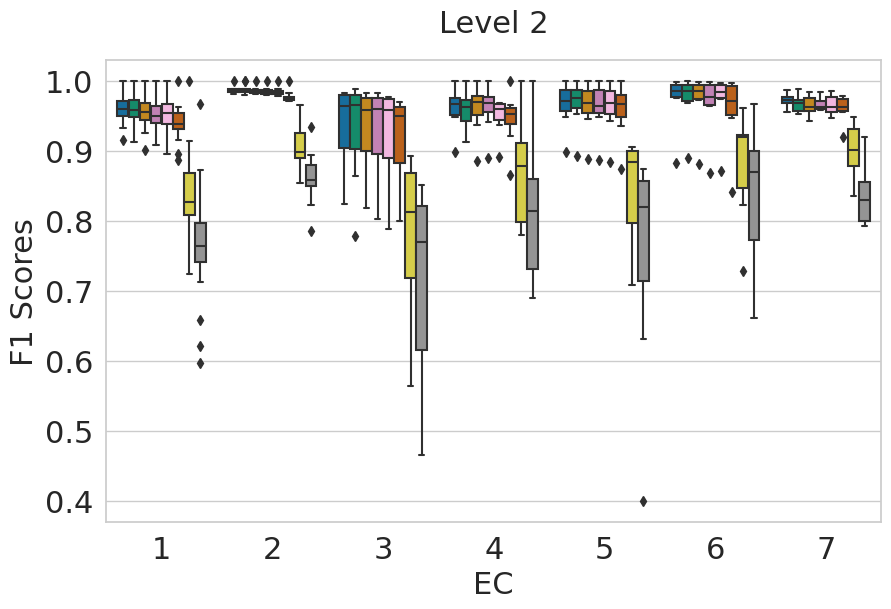

In [9]:
ec_2 = pd.read_csv("f1_score_per_ec_results_2.csv")

plot_f1_scores(ec_2, 2)

In [11]:
from scipy.stats import wilcoxon
import itertools

f1_scores = ec_2

pipeline_names = f1_scores['Model'].unique()

significant_differences_f1 = []
# Perform Wilcoxon test per EC level
for model1, model2 in itertools.combinations(pipeline_names, 2):
    for ec in f1_scores['Level'].unique():
        subset1 = f1_scores[(f1_scores['Level'] == ec) & (f1_scores["Model"] == model1)]
        subset2 = f1_scores[(f1_scores['Level'] == ec) & (f1_scores["Model"] == model2)]
        stat, p_value = wilcoxon(subset1['F1 score'], subset2['F1 score'])

        if p_value < 0.05:
            significant_differences_f1.append((model1, model2, p_value, ec))


# Print out the pairs of pipelines that have significantly different F1 scores
for diff in significant_differences_f1:
    
    print(f"Significant difference between {diff[0]} and {diff[1]} with p-value {diff[2]}, {diff[3]}")


/home/jcapela/miniforge3/envs/ec_numbers_prediction/lib/python3.9/site-packages/scipy/stats/_wilcoxon.py:199: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


Significant difference between BLASTp and DNN ESM1b with p-value 0.027621013367531002, 1
Significant difference between BLASTp and DNN ESM1b with p-value 0.027707849358079864, 5
Significant difference between BLASTp and DNN ESM2 3B with p-value 0.02276874371892181, 1
Significant difference between BLASTp and DNN ESM2 3B with p-value 0.027707849358079864, 5
Significant difference between BLASTp and DNN ProtBERT with p-value 8.857457687863547e-05, 1
Significant difference between BLASTp and DNN ProtBERT with p-value 0.007685794055213263, 2
Significant difference between BLASTp and DNN ProtBERT with p-value 0.027707849358079864, 5
Significant difference between BLASTp and D-SPACE EC with p-value 8.857457687863547e-05, 1
Significant difference between BLASTp and D-SPACE EC with p-value 0.001953125, 2
Significant difference between BLASTp and D-SPACE EC with p-value 0.0009765625, 3
Significant difference between BLASTp and D-SPACE EC with p-value 0.017960477526078766, 4
Significant differen

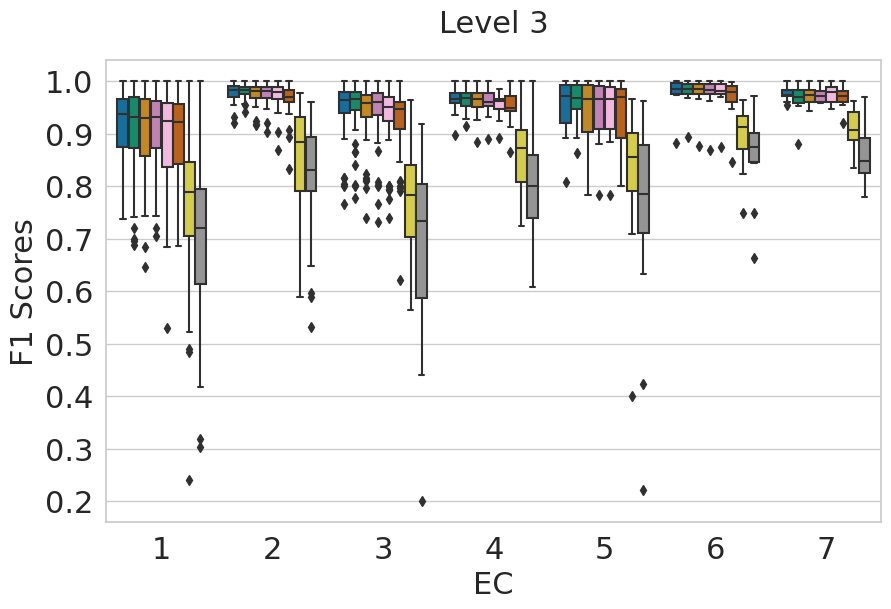

In [12]:
ec_2 = pd.read_csv("f1_score_per_ec_results_3.csv")

plot_f1_scores(ec_2, 3)

In [14]:
from scipy.stats import wilcoxon
import itertools

f1_scores = ec_2

pipeline_names = f1_scores['Model'].unique()

significant_differences_f1 = []
# Perform Wilcoxon test per EC level
for model1, model2 in itertools.combinations(pipeline_names, 2):
    for ec in f1_scores['Level'].unique():
        subset1 = f1_scores[(f1_scores['Level'] == ec) & (f1_scores["Model"] == model1)]
        subset2 = f1_scores[(f1_scores['Level'] == ec) & (f1_scores["Model"] == model2)]
        stat, p_value = wilcoxon(subset1['F1 score'], subset2['F1 score'])

        if p_value < 0.05:
            significant_differences_f1.append((model1, model2, p_value, ec))


# Print out the pairs of pipelines that have significantly different F1 scores
for diff in significant_differences_f1:
    
    print(f"Significant difference between {diff[0]} and {diff[1]} with p-value {diff[2]}, {diff[3]}")


Significant difference between BLASTp and DNN ESM1b with p-value 0.00010366215324759244, 1
Significant difference between BLASTp and DNN ESM1b with p-value 0.0036337564975753973, 2
Significant difference between BLASTp and DNN ESM1b with p-value 0.0008579767555805248, 3
Significant difference between BLASTp and DNN ESM1b with p-value 0.006318521553682498, 5
Significant difference between BLASTp and DNN ESM2 3B with p-value 0.00918142110309248, 5
Significant difference between BLASTp and DNN ESM2 3B with p-value 0.03569190011680441, 6
Significant difference between BLASTp and DNN ProtBERT with p-value 1.2972009443369052e-05, 1
Significant difference between BLASTp and DNN ProtBERT with p-value 8.880320037056858e-05, 2
Significant difference between BLASTp and DNN ProtBERT with p-value 1.020610297049795e-05, 3
Significant difference between BLASTp and DNN ProtBERT with p-value 0.010593539088689496, 4
Significant difference between BLASTp and DNN ProtBERT with p-value 0.003783246451258581